In [56]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf

In [57]:
for dirpath, dirnames, filenames in os.walk('Birds - Copy'):
    print(f'There Are {len(dirnames)} Directories And {len(filenames)} Images In {dirpath}')

There Are 5 Directories And 4 Images In Birds - Copy
There Are 2 Directories And 3 Images In Birds - Copy\archive
There Are 3 Directories And 6 Images In Birds - Copy\archive\CUB_200_2011
There Are 0 Directories And 3 Images In Birds - Copy\archive\CUB_200_2011\attributes
There Are 200 Directories And 0 Images In Birds - Copy\archive\CUB_200_2011\images
There Are 0 Directories And 60 Images In Birds - Copy\archive\CUB_200_2011\images\001.Black_footed_Albatross
There Are 0 Directories And 60 Images In Birds - Copy\archive\CUB_200_2011\images\002.Laysan_Albatross
There Are 0 Directories And 58 Images In Birds - Copy\archive\CUB_200_2011\images\003.Sooty_Albatross
There Are 0 Directories And 60 Images In Birds - Copy\archive\CUB_200_2011\images\004.Groove_billed_Ani
There Are 0 Directories And 44 Images In Birds - Copy\archive\CUB_200_2011\images\005.Crested_Auklet
There Are 0 Directories And 41 Images In Birds - Copy\archive\CUB_200_2011\images\006.Least_Auklet
There Are 0 Directories An

There Are 0 Directories And 60 Images In Birds - Copy\archive\CUB_200_2011\images\136.Barn_Swallow
There Are 0 Directories And 60 Images In Birds - Copy\archive\CUB_200_2011\images\137.Cliff_Swallow
There Are 0 Directories And 60 Images In Birds - Copy\archive\CUB_200_2011\images\138.Tree_Swallow
There Are 0 Directories And 60 Images In Birds - Copy\archive\CUB_200_2011\images\139.Scarlet_Tanager
There Are 0 Directories And 60 Images In Birds - Copy\archive\CUB_200_2011\images\140.Summer_Tanager
There Are 0 Directories And 58 Images In Birds - Copy\archive\CUB_200_2011\images\141.Artic_Tern
There Are 0 Directories And 60 Images In Birds - Copy\archive\CUB_200_2011\images\142.Black_Tern
There Are 0 Directories And 60 Images In Birds - Copy\archive\CUB_200_2011\images\143.Caspian_Tern
There Are 0 Directories And 60 Images In Birds - Copy\archive\CUB_200_2011\images\144.Common_Tern
There Are 0 Directories And 60 Images In Birds - Copy\archive\CUB_200_2011\images\145.Elegant_Tern
There Are

There Are 0 Directories And 60 Images In Birds - Copy\archive\segmentations\076.Dark_eyed_Junco
There Are 0 Directories And 60 Images In Birds - Copy\archive\segmentations\077.Tropical_Kingbird
There Are 0 Directories And 59 Images In Birds - Copy\archive\segmentations\078.Gray_Kingbird
There Are 0 Directories And 60 Images In Birds - Copy\archive\segmentations\079.Belted_Kingfisher
There Are 0 Directories And 60 Images In Birds - Copy\archive\segmentations\080.Green_Kingfisher
There Are 0 Directories And 60 Images In Birds - Copy\archive\segmentations\081.Pied_Kingfisher
There Are 0 Directories And 60 Images In Birds - Copy\archive\segmentations\082.Ringed_Kingfisher
There Are 0 Directories And 60 Images In Birds - Copy\archive\segmentations\083.White_breasted_Kingfisher
There Are 0 Directories And 53 Images In Birds - Copy\archive\segmentations\084.Red_legged_Kittiwake
There Are 0 Directories And 60 Images In Birds - Copy\archive\segmentations\085.Horned_Lark
There Are 0 Directories 

In [58]:
num_of_bird_groups = len(os.listdir('Birds - Copy/train'))
num_of_bird_groups

7

In [59]:
import pathlib

data_dir = pathlib.Path('Birds - Copy/train')
classnames = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(classnames)

['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'HOUSE SPARROW']


In [60]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup The Target Directory
  target_folder = target_dir + target_class

  # Getting A Random Image Path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read In The Image And Plot It Using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');
  
  return img

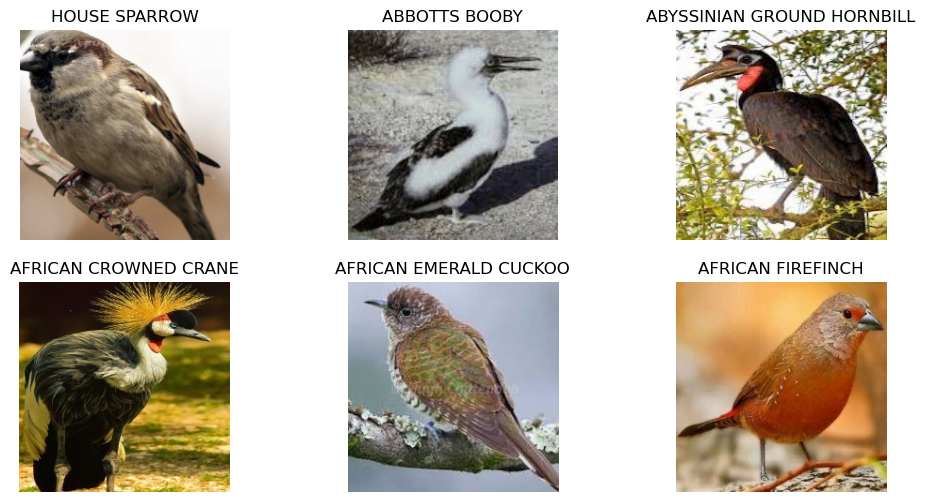

In [61]:
plt.figure(figsize = (12,6))

plt.subplot(231)
img1 = view_random_image('Birds - Copy/train/', "HOUSE SPARROW")

plt.subplot(232)
img2 = view_random_image('Birds - Copy/train/', "ABBOTTS BOOBY")

plt.subplot(233)
img3 = view_random_image('Birds - Copy/train/', "ABYSSINIAN GROUND HORNBILL")

plt.subplot(234)
img4 = view_random_image('Birds - Copy/train/', "AFRICAN CROWNED CRANE")

plt.subplot(235)
img5 = view_random_image('Birds - Copy/train/', "AFRICAN EMERALD CUCKOO")

plt.subplot(236)
img5 = view_random_image('Birds - Copy/train/', "AFRICAN FIREFINCH")

In [62]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setting The Random Seed
tf.random.set_seed(7)

# Setting Up Paths To Our Data Directories
train_dir = 'Birds - Copy/train/'
test_dir = 'Birds - Copy/test/'
val_dir = 'Birds - Copy/valid'

# Preprocessing Data (Scaling/Normalization)
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

# Importing Data From The Directories And Turning It Into Batches
train_data = train_datagen.flow_from_directory(train_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode='categorical')

val_data = val_datagen.flow_from_directory(val_dir,
                                           batch_size=32,
                                           target_size=(224, 224),
                                           class_mode='categorical')

Found 1108 images belonging to 7 classes.
Found 35 images belonging to 7 classes.
Found 35 images belonging to 7 classes.


In [63]:
# 1. Creating A Base Model With tf.keras.applications
base_model = tf.keras.applications.InceptionV3(include_top=False)

# 2. Freezing The Base Model
base_model.trainable = False

# 3. Creating Inputs Into Our Model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='InputLayer')

# 4. Passing The Inputs To The Base Model
x = base_model(inputs)

# 5. Average Pooling The Outputs Of The Base Model
x = tf.keras.layers.GlobalAveragePooling2D(name='GlobalAveragePoolingLayer')(x)

# 6. Creating The Output Activation Layer
outputs = tf.keras.layers.Dense(num_of_bird_groups, activation='softmax', name='OutputLayer')(x)

# 7. Combining The Inputs With The Outputs Into A Model
model_0 = tf.keras.Model(inputs, outputs)

# 8. Compiling The Model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
# 9. Fitting The Model
history_0 = model_0.fit(train_data,
                       epochs=10,
                       steps_per_epoch=len(train_data),
                       validation_data=val_data,
                       validation_steps=int(0.25*len(val_data)))

Epoch 1/10
35/35 [==============================] - 27s 677ms/step - loss: 0.6983 - accuracy: 0.7608
Epoch 2/10
35/35 [==============================] - 24s 672ms/step - loss: 0.1850 - accuracy: 0.9449
Epoch 3/10
35/35 [==============================] - 25s 722ms/step - loss: 0.1318 - accuracy: 0.9666
Epoch 4/10
35/35 [==============================] - 25s 726ms/step - loss: 0.1033 - accuracy: 0.9756
Epoch 5/10
35/35 [==============================] - 26s 734ms/step - loss: 0.0836 - accuracy: 0.9774
Epoch 6/10
35/35 [==============================] - 25s 721ms/step - loss: 0.0667 - accuracy: 0.9838
Epoch 7/10
35/35 [==============================] - 25s 720ms/step - loss: 0.0538 - accuracy: 0.9919
Epoch 8/10
35/35 [==============================] - 25s 720ms/step - loss: 0.0445 - accuracy: 0.9928
Epoch 9/10
35/35 [==============================] - 25s 722ms/step - loss: 0.0405 - accuracy: 0.9964
Epoch 10/10
35/35 [==============================] - 26s 750ms/step - loss: 0.0336 - accura

In [65]:
model_0.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 GlobalAveragePoolingLayer (  (None, 2048)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 OutputLayer (Dense)         (None, 7)                 14343     
                                                                 
Total params: 21,817,127
Trainable params: 14,343
Non-trainable params: 21,802,784
_________________________________________________________________


In [66]:
results_0 = model_0.evaluate(test_data)
results_0

2/2 [==============================] - 2s 91ms/step - loss: 0.0360 - accuracy: 0.9714


[0.03597797825932503, 0.9714285731315613]

In [67]:
model_0.save('base_model_0.h5')

In [68]:
def plot_loss_curves(history):
  """
  Returns Separate Loss Curves For Training And Validation Metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plotting Loss
  plt.plot(epochs, loss, label='TRAINING_LOSS')
  plt.plot(epochs, val_loss, label='VAL_LOSS')
  plt.title('LOSS')
  plt.xlabel('EPOCHS')
  plt.legend()

  # Plotting Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='TRAINING_ACCURACY')
  plt.plot(epochs, val_accuracy, label='VAL_ACCURACY')
  plt.title('ACCURACY')
  plt.xlabel('EPOCHS')
  plt.legend()

In [69]:
plot_loss_curves(history_0)

KeyError: 'val_loss'

In [70]:
# Creating Data Augmentation Layer With horizontal flipping, rotations, zooms, etc
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1./255)
], name='DataAugmentationLayer')

(-0.5, 241.5, 186.5, -0.5)

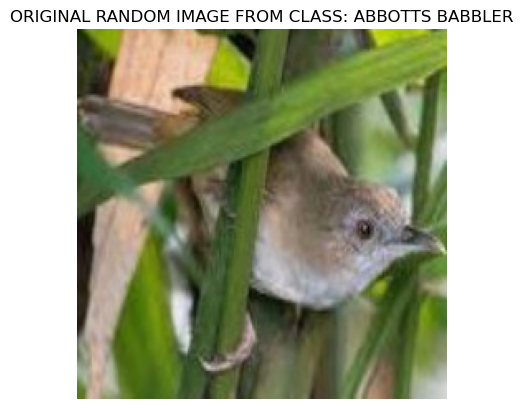

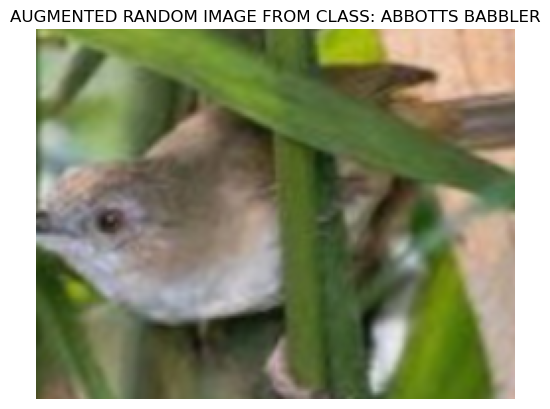

In [71]:
target_class = random.choice(classnames)
target_dir = 'Birds - Copy/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image

# Read And Plot In The Random Image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'ORIGINAL RANDOM IMAGE FROM CLASS: {target_class}')
plt.axis(False);

# Now Let's Plot Our Augmented Random Image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0), training=True)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f'AUGMENTED RANDOM IMAGE FROM CLASS: {target_class}')
plt.axis(False)

In [72]:
# 1. Creating A Base Model With tf.keras.applications
base_model = tf.keras.applications.InceptionV3(include_top=False)

# 2. Freezing The Base Model
base_model.trainable = False

# 3. Creating Inputs Into Our Model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='InputLayer')

# 4. Adding Data Augmentation Sequential Model As A Layer
x = data_augmentation(inputs)

# 4. Passing The Inputs To The Base Model
x = base_model(x, training=False)

# 5. Average Pooling The Outputs Of The Base Model
x = tf.keras.layers.GlobalAveragePooling2D(name='GlobalAveragePoolingLayer')(x)

# 6. Creating The Output Activation Layer
outputs = tf.keras.layers.Dense(num_of_bird_groups, activation='softmax', name='OutputLayer')(x)

# 7. Combining The Inputs With The Outputs Into A Model
model_1 = tf.keras.Model(inputs, outputs)

# 8. Compiling The Model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
# 9. Fitting The Model
history_1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=val_data,
                       validation_steps=int(0.25*len(val_data)))

Epoch 1/5
35/35 [==============================] - 30s 747ms/step - loss: 0.9155 - accuracy: 0.6751
Epoch 2/5
35/35 [==============================] - 25s 730ms/step - loss: 0.3268 - accuracy: 0.8899
Epoch 3/5
35/35 [==============================] - 27s 778ms/step - loss: 0.2646 - accuracy: 0.9233
Epoch 4/5
35/35 [==============================] - 26s 744ms/step - loss: 0.2116 - accuracy: 0.9350
Epoch 5/5
35/35 [==============================] - 29s 832ms/step - loss: 0.1885 - accuracy: 0.9413


In [73]:
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 DataAugmentationLayer (Sequ  (None, 224, 224, 3)      0         
 ential)                                                         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 GlobalAveragePoolingLayer (  (None, 2048)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 OutputLayer (Dense)         (None, 7)                 14343     
                                                                 
Total params: 21,817,127
Trainable params: 14,343
Non-train

In [74]:
results_1 = model_1.evaluate(test_data)
results_1

2/2 [==============================] - 2s 94ms/step - loss: 0.0405 - accuracy: 1.0000


[0.040483977645635605, 1.0]

In [75]:
model_1.save('data_aug_model_1.h5')

In [76]:
model_0.layers

In [77]:
for layer in model_0.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x00000149D7138220> True
<keras.engine.functional.Functional object at 0x00000149D74CA0D0> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x00000149E3242520> True
<keras.layers.core.dense.Dense object at 0x00000149E33F92B0> True


In [78]:
for i, layer in enumerate(model_0.layers[1].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 conv2d_188 False
2 batch_normalization_188 False
3 activation_188 False
4 conv2d_189 False
5 batch_normalization_189 False
6 activation_189 False
7 conv2d_190 False
8 batch_normalization_190 False
9 activation_190 False
10 max_pooling2d_8 False
11 conv2d_191 False
12 batch_normalization_191 False
13 activation_191 False
14 conv2d_192 False
15 batch_normalization_192 False
16 activation_192 False
17 max_pooling2d_9 False
18 conv2d_196 False
19 batch_normalization_196 False
20 activation_196 False
21 conv2d_194 False
22 conv2d_197 False
23 batch_normalization_194 False
24 batch_normalization_197 False
25 activation_194 False
26 activation_197 False
27 average_pooling2d_18 False
28 conv2d_193 False
29 conv2d_195 False
30 conv2d_198 False
31 conv2d_199 False
32 batch_normalization_193 False
33 batch_normalization_195 False
34 batch_normalization_198 False
35 batch_normalization_199 False
36 activation_193 False
37 activation_195 False
38 activation_198 False
39 activation

In [79]:
print(len(model_0.layers[1].trainable_variables))

0


In [80]:
base_model.trainable = True

# Freezing All The Layers Except For The Last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompiling The Model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

In [81]:
for i, layer in enumerate(model_0.layers[1].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 conv2d_188 False
2 batch_normalization_188 False
3 activation_188 False
4 conv2d_189 False
5 batch_normalization_189 False
6 activation_189 False
7 conv2d_190 False
8 batch_normalization_190 False
9 activation_190 False
10 max_pooling2d_8 False
11 conv2d_191 False
12 batch_normalization_191 False
13 activation_191 False
14 conv2d_192 False
15 batch_normalization_192 False
16 activation_192 False
17 max_pooling2d_9 False
18 conv2d_196 False
19 batch_normalization_196 False
20 activation_196 False
21 conv2d_194 False
22 conv2d_197 False
23 batch_normalization_194 False
24 batch_normalization_197 False
25 activation_194 False
26 activation_197 False
27 average_pooling2d_18 False
28 conv2d_193 False
29 conv2d_195 False
30 conv2d_198 False
31 conv2d_199 False
32 batch_normalization_193 False
33 batch_normalization_195 False
34 batch_normalization_198 False
35 batch_normalization_199 False
36 activation_193 False
37 activation_195 False
38 activation_198 False
39 activation

In [82]:
# Number Of Trainable Layers
print(len(model_0.trainable_variables))

2


In [ ]:
initial_epochs = 10

# Fine Tuning For Another 5 Epochs
fine_tune_epochs = initial_epochs + 5

# Refitting The Model
history_fine_tuned = model_0.fit(train_data,
                                 epochs=fine_tune_epochs,
                                 validation_data=val_data,
                                 validation_steps=int(0.25 * len(val_data)),
                                 initial_epoch=history_0.epoch[-1])

Epoch 10/15
35/35 [==============================] - 27s 689ms/step - loss: 0.0292 - accuracy: 0.9982
Epoch 11/15
35/35 [==============================] - 23s 669ms/step - loss: 0.0275 - accuracy: 0.9991
Epoch 12/15
35/35 [==============================] - 24s 692ms/step - loss: 0.0260 - accuracy: 1.0000
Epoch 13/15
35/35 [==============================] - 25s 709ms/step - loss: 0.0251 - accuracy: 1.0000
Epoch 14/15
35/35 [==============================] - 25s 714ms/step - loss: 0.0238 - accuracy: 1.0000
Epoch 15/15
 1/35 [..............................] - ETA: 25s - loss: 0.0100 - accuracy: 1.0000

In [ ]:
# Evaluating The Fine Tuned Model
results_fine_tuned = model_0.evaluate(test_data)

In [ ]:
model_0.save('fined_tuned_model_0.h5')

In [ ]:
# loaded_model = tf.keras.models.load_model('fined_tuned_model_0.h5')
# results_loaded = loaded_model.evaluate(test_data)

In [ ]:
plot_loss_curves(history_fine_tuned)

In [ ]:
import matplotlib.pyplot as plt

def compare_historys(original_history, new_history, initial_epochs=5):
  """
  Compares Two TensorFlow History Objects
  """
  # Getting Original History Measurements
  acc = original_history.history['accuracy']
  loss = original_history.history['loss']

  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']

  # Combining Original History Metrics With New History Metrics
  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  total_val_acc = val_acc + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  # Making Plots For Accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label='TRAINING ACCURACY')
  plt.plot(total_val_acc, label='VAL ACCURACY')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='START FINE TUNING')
  plt.legend(loc='lower right')
  plt.title('TRAINING AND VALIDATION ACCURACY')

  # Making Plots For Loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='TRAINING LOSS')
  plt.plot(total_val_loss, label='VAL LOSS')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='START FINE TUNING')
  plt.legend(loc='upper right')
  plt.title('TRAINING AND VALIDATION LOSS')

In [ ]:
compare_historys(history_0,
                 history_fine_tuned,
                 initial_epochs=10)

In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads In An Image From Filename, Turns It Into A tensor And Reshapes Into
  Specified Shape (img_shape, imag_shape, color_channels=3).

  Args:
    filename (str): path to target image
    image-shape (int): height/width dimension of target image size
    scale (bool): scale pixel values from 0-225 to 0-1 or not
  
  Returns:
  Image Tensor Of Shape (img_shape, img_shape, 3)
  """
  # Read In The Image 
  img = tf.io.read_file(filename)

  # Decode Image Into Tensor
  img = tf.io.decode_image(img, channels=3)

  # Resizing The Image
  img = tf.image.resize(img, [img_shape, img_shape])

  # scale? Yes/No
  if scale:
    return img/255.
  else:
    return img

In [ ]:
def pred_and_plot(model, filename, class_names=classnames):
  
  """
  Imports An Image Located At Filename, Makes A Prediction With Model
  And Plots The Image With The Predicted Class As The Title
  """

  # Importing the Target Image And Preprocessing It
  img = load_and_prep_image(filename)

  # Make A Prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Adding Logic For Multi-Class And Get pred_class name
  if len(pred[0]) > 1:
    pred_class = classnames[tf.argmax(pred[0])]
  else:
    pred_class = classnames[int(tf.round(pred[0]))]


  # Plotting The Image And Predicted Class
  plt.imshow(img)
  plt.title(f'PREDICTION: {pred_class}')
  plt.axis(False);

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(331)
pred_and_plot(model_0, filename='Birds - Copy/images to test/1.jpg')

plt.subplot(332)
pred_and_plot(model_0, filename='Birds - Copy/images to test/2.jpg')

plt.subplot(333)
pred_and_plot(model_0, filename='Birds - Copy/images to test/3.jpg')

plt.subplot(334)
pred_and_plot(model_0, filename='Birds - Copy/images to test/4.jpg')

plt.subplot(335)
pred_and_plot(model_0, filename='Birds - Copy/images to test/5.jpg')

plt.subplot(336)
pred_and_plot(model_0, filename='Birds - Copy/images to test/6.jpg')





In [ ]:
# Unfreezing All Of The Layers In The Base Model
base_model.trainable = True

# Refreezing Every Layer Except The Last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
# Recompiling Model With Lower Learning Rate
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

In [ ]:
# What Layers In The Model Are Trainable?
for layer in model_1.layers:
  print(layer.name, layer.trainable)

In [ ]:
# Checking Which Layers Are Trainable In Our Base Model
for layer_number, layer in enumerate(model_1.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

In [ ]:
initial_epochs = 5

# Fine Tuning For Another 5 Epochs
fine_tune_epochs = initial_epochs + 5

# Refitting The Model
history_data_aug_fine_tuned = model_1.fit(train_data,
                                 epochs=fine_tune_epochs,
                                 validation_data=val_data,
                                 validation_steps=int(0.25 * len(val_data)),
                                 initial_epoch=history_1.epoch[-1])

In [42]:
# Evaluating The Fine Tuned Model
results_data_aug_fine_tuned = model_1.evaluate(test_data)

1/1 [==============================] - 2s 2s/step - loss: 0.0186 - accuracy: 1.0000


In [43]:
model_1.save('birds_clss_data_aug_fined_tuned_model_1.h5')

In [44]:
# Plotting The Loss Curves Of The Fine Tuned Model
plot_loss_curves(history_data_aug_fine_tuned)

KeyError: 'val_loss'

In [45]:
compare_historys(history_1,
                 history_data_aug_fine_tuned,
                 initial_epochs=5)

KeyError: 'val_accuracy'